<h2>Author : IMT2021048 - Suyash Ajit Chavan </h2>

In [1]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing netCDF4 for working with netCDF datasets
import netCDF4 as nc

# Importing NumPy for numerical operations
import numpy as np

In [2]:
# Open the netCDF dataset
dataset0 = nc.Dataset("dataset/sea_surface_temperature0.nc")

# Get a list of variable names (columns) in the dataset
columns = list(dataset0.variables.keys())
print("List of variables (columns) in the dataset:")
print(columns)

# Select the last variable in the list, it represents surface temperature
surf_temperature = columns[-1]
print("\nSelected surface temperature variable:")
print(surf_temperature)

List of variables (columns) in the dataset:
['lon', 'lat', 'time', 'time_bnds', 'SST']

Selected surface temperature variable:
SST


<h2>Data transformation</h2>

In [3]:
import xarray as xr

# Function to get latitude from a netCDF dataset
def get_latitude(i):
    return nc.Dataset(f'dataset/sea_surface_temperature{i}.nc').variables['lat'][:]

# Function to get longitude from a netCDF dataset
def get_longitude(i):
    return nc.Dataset(f'dataset/sea_surface_temperature{i}.nc').variables['lon'][:]

# Function to get a processed dataset using xarray
def get_dataset(i):
    # Open the netCDF dataset using xarray and convert it to a DataFrame
    cur_dataset_df = xr.open_dataset(f'dataset/sea_surface_temperature{i}.nc', decode_times=False).to_dataframe().reset_index([0, 1, 2, 3])

    # Filter the DataFrame where 'bnds' column is equal to 0
    final_df = cur_dataset_df[cur_dataset_df['bnds'] == 0]

    return final_df

# Lists to store latitude, longitude, and datasets
dataset_list = []
latitude_list = []
longitude_list = []

# List of titles for each dataset
title_list = ['2 January 2021', '12 January 2021', '22 January 2021', '31 January 2021', '8 February 2021', '18 February 2021', '28 February 2021', '5 March 2021', '15 March 2021', '25 March 2021']

# Loop through the datasets
number_of_datasets = 10
for i in range(number_of_datasets):
    # Get latitude and longitude and append to the respective lists
    latitude_list.append(get_latitude(i))
    longitude_list.append(get_longitude(i))

    # Get the processed dataset and append to the dataset_list
    dataset_list.append(get_dataset(i))

In [4]:
# Importing Matplotlib for creating plots
import matplotlib.pyplot as plt

# Importing io module for handling file-like objects
import io

# Importing Cartopy for geographical projections and mapping
import cartopy.crs as ccrs

# Importing imageio for creating and saving animated images (GIFs)
import imageio

# Importing Cartopy features for adding geographical features to the plot
import cartopy.feature as cfeature

# Importing gridliner modules from Cartopy for adding latitude and longitude gridlines
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter


<h2>Contour Mapping Using Marching Squares </h2>

In [5]:
# code for contour mapping algorithm which internally uses marching squares algorithm
def contour_mapping(dataset_name, latitude, longitude, title, isovalue_lines):
    # Create a meshgrid from latitude and longitude
    X, Y = np.meshgrid(latitude, longitude)
    
    # Extract temperature values from the dataset and reshape
    temperature_values = dataset_name[surf_temperature].to_numpy().reshape(-1, 720)
    
    # Create a DataFrame with latitude and longitude as indices
    contour_map_coordinates = pd.DataFrame(columns=latitude, index=longitude, data=temperature_values)
    
    # Create a figure with a Cartopy projection
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Optionally, add other map features (e.g., country borders)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.7, zorder=2)

    # Add coastlines to the plot
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

    # Shift the values from longitude 180 to the start of the plot
    shifted_map_cord = np.roll(contour_map_coordinates, 720, axis=1)

    # Make contour plot
    plt.contour(Y, X, shifted_map_cord, colors='k', linewidths=0.01, levels=isovalue_lines)
    im = plt.contour(Y, X, shifted_map_cord, cmap='viridis', levels=isovalue_lines)

    # Add colorbar and labels
    plt.colorbar(im, fraction=0.025, pad=0.04)
    plt.xlabel('Longitude Values')
    plt.ylabel('Latitude Values')
    ax.set_title(f"CONTOUR MAPPING USING MARCHING SQUARES => Sea Surface Temperature : {title}")

    # Set ticks and formatters for latitude and longitude
    ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    # Show the plot
    plt.show()
    
    return fig


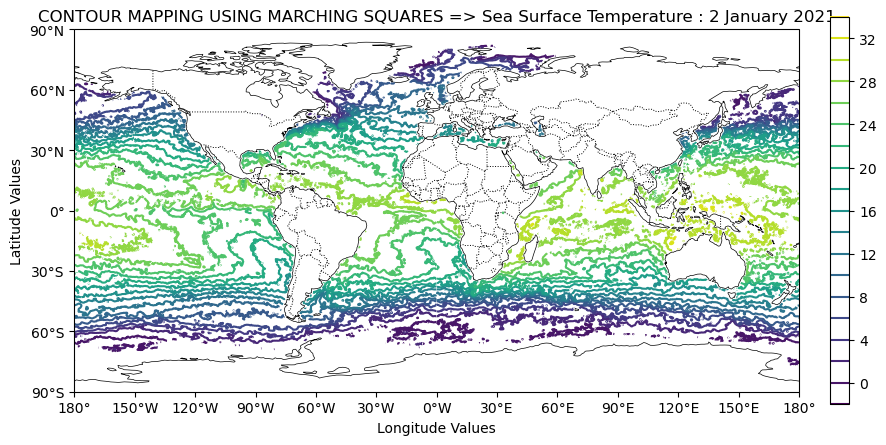

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


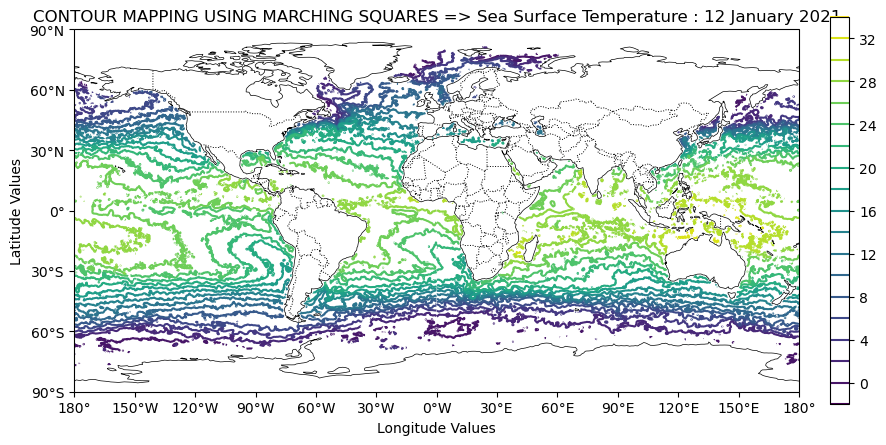

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


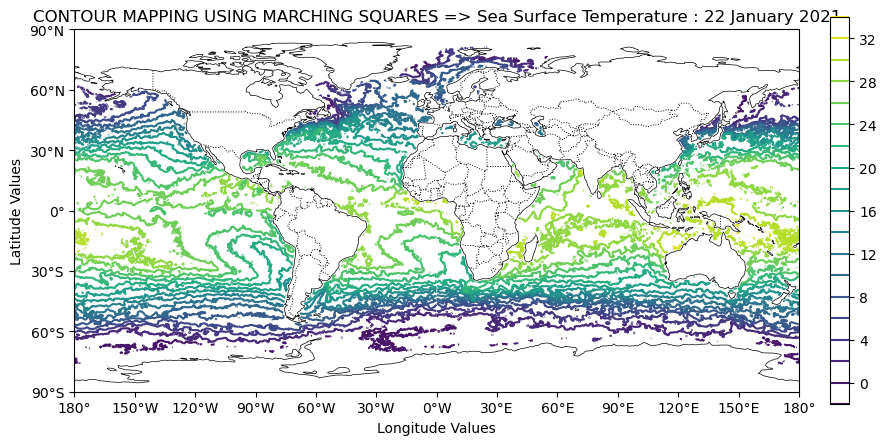

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


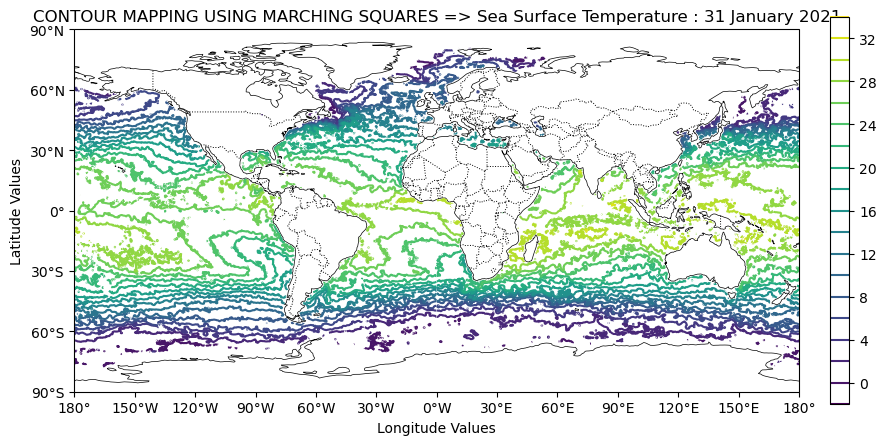

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


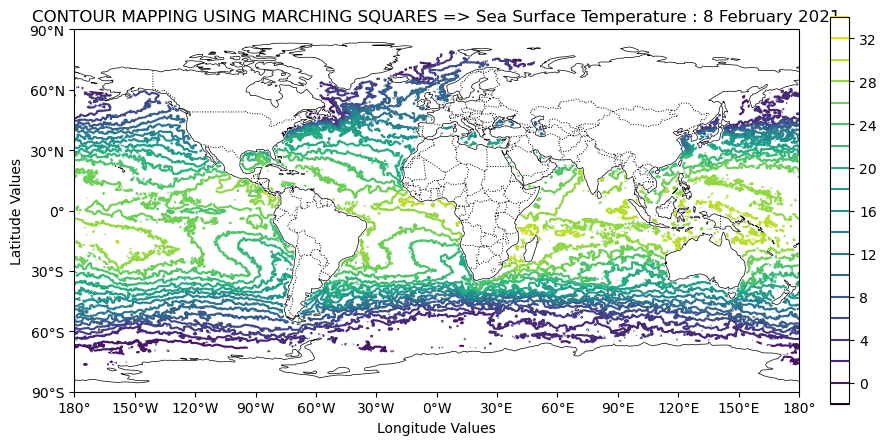

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


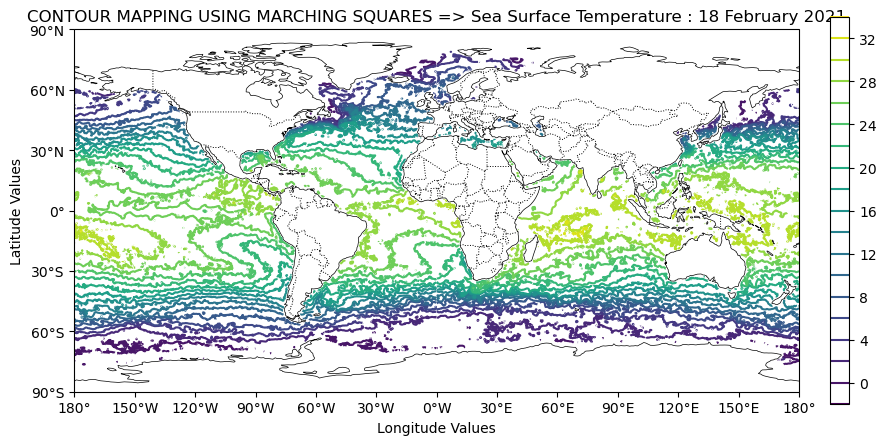

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


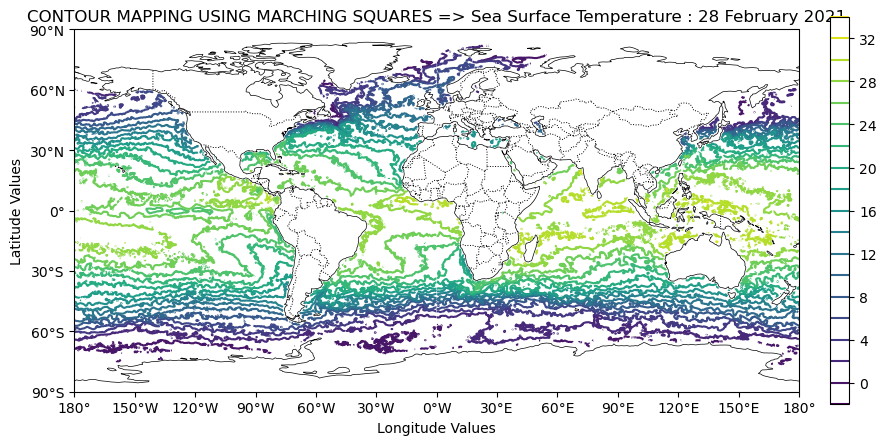

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


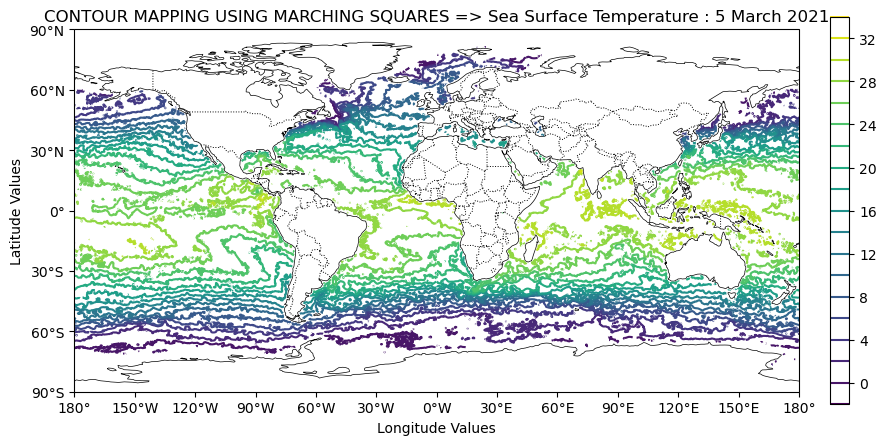

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


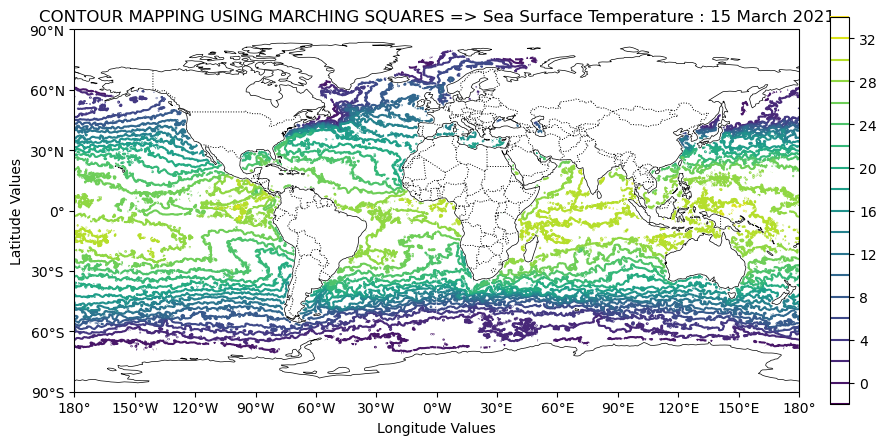

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


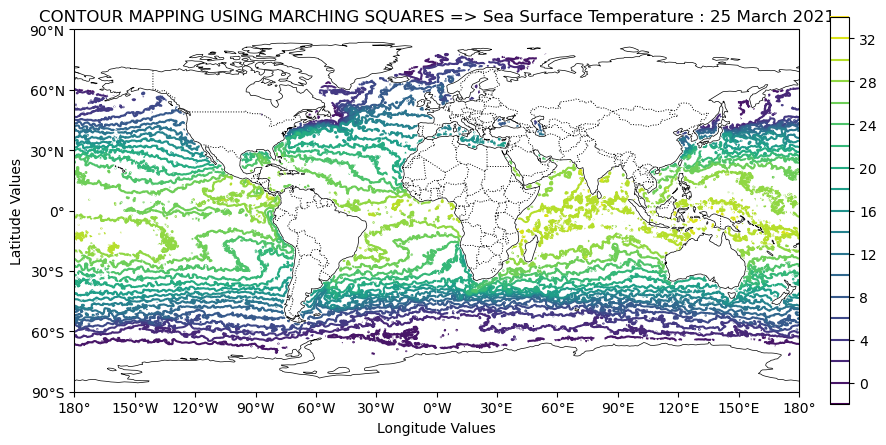

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\2798849357.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_mapping_list.append(imageio.imread(buf))


In [6]:
import os
# List to store contour maps
contour_mapping_list = []

# Number of isovalue lines
isovalue_lines = 20

# Function to add a contour map to the list
def add_contour_mapping(fig):
    buf = io.BytesIO()
    fig.canvas.print_png(buf)
    buf.seek(0)
    contour_mapping_list.append(imageio.imread(buf))

# Loop through the datasets
for i in range(number_of_datasets):
    # Generate the current contour map
    current_contour = contour_mapping(dataset_list[i], latitude_list[i], longitude_list[i], title_list[i], isovalue_lines)
    
    # Add the current contour map to the list
    add_contour_mapping(current_contour)

def save_contour_mapping_images(contour_mapping_list):
    folder_path = './images'
    for i, image in enumerate(contour_mapping_list):
        image_path = os.path.join(folder_path, f'contour_map_{i}.png')
        imageio.imwrite(image_path, image)

save_contour_mapping_images(contour_mapping_list)

In [7]:
# Save the list of contour maps as a GIF
imageio.mimsave('contour_mapping.gif', contour_mapping_list, fps=1, loop=10)

<h2>Contour Fill </h2>

In [8]:
# code for contour fill algorithm
def contour_fill(dataset_name, latitude, longitude, title, isovalue_lines):
    # Create a meshgrid from latitude and longitude
    X, Y = np.meshgrid(latitude, longitude)
    
    # Extract temperature values from the dataset and reshape
    temperature_values = dataset_name[surf_temperature].to_numpy().reshape(-1, 720)
    
    # Create a DataFrame with latitude and longitude as indices
    contour_map_coordinates = pd.DataFrame(columns=latitude, index=longitude, data=temperature_values)
    
    # Create a figure with a Cartopy projection
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Optionally, add other map features (e.g., country borders)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.7, zorder=2)

    # Add coastlines to the plot
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

    # Shift the values from longitude 180 to the start of the plot
    shifted_map_cord = np.roll(contour_map_coordinates, 720, axis=1)

    # Make contour plot with filled contours
    plt.contour(Y, X, shifted_map_cord, colors='k', linewidths=0.2, levels=isovalue_lines)
    im = plt.contourf(Y, X, shifted_map_cord, cmap='viridis', levels=isovalue_lines)

    # Add colorbar and labels
    plt.colorbar(im, fraction=0.025, pad=0.04)
    plt.xlabel('Longitude Values')
    plt.ylabel('Latitude Values')
    ax.set_title(f"CONTOUR FILL => Sea Surface Temperature : {title}")

    # Set ticks and formatters for latitude and longitude
    ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    # Show the plot
    plt.show()
    
    return fig


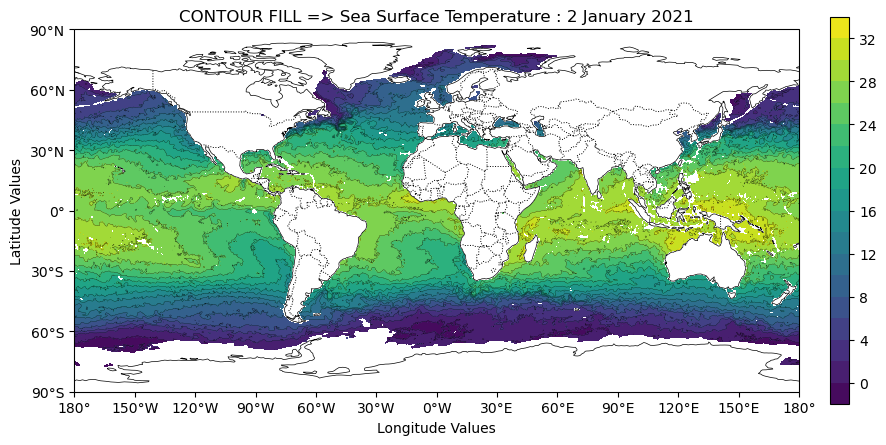

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


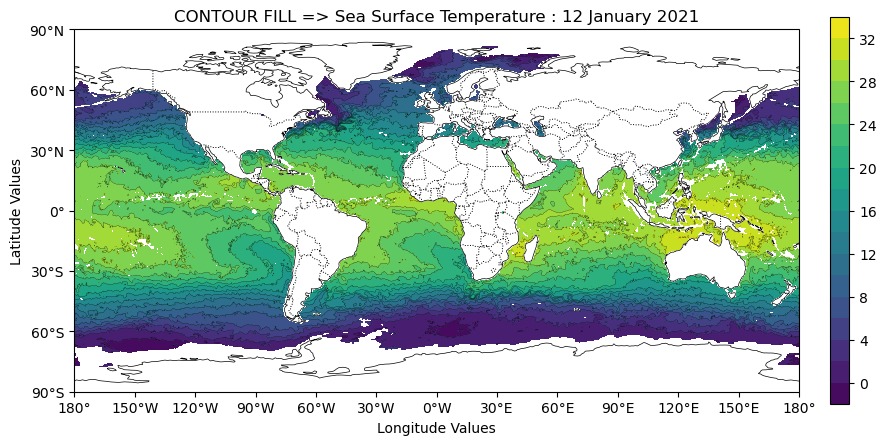

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


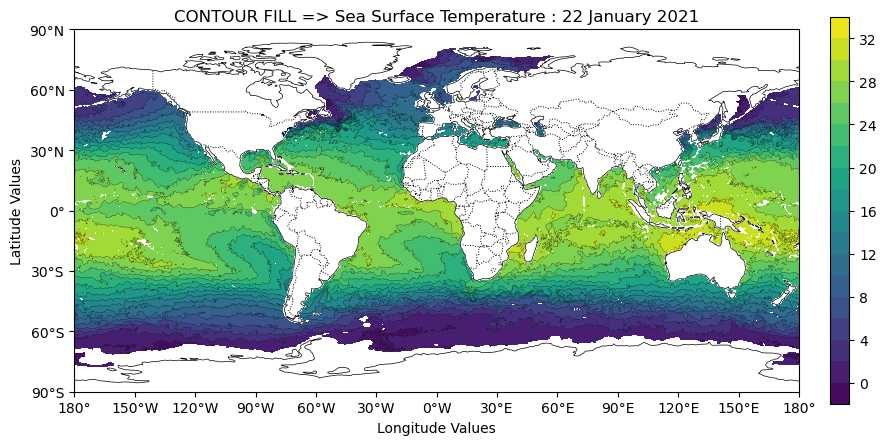

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


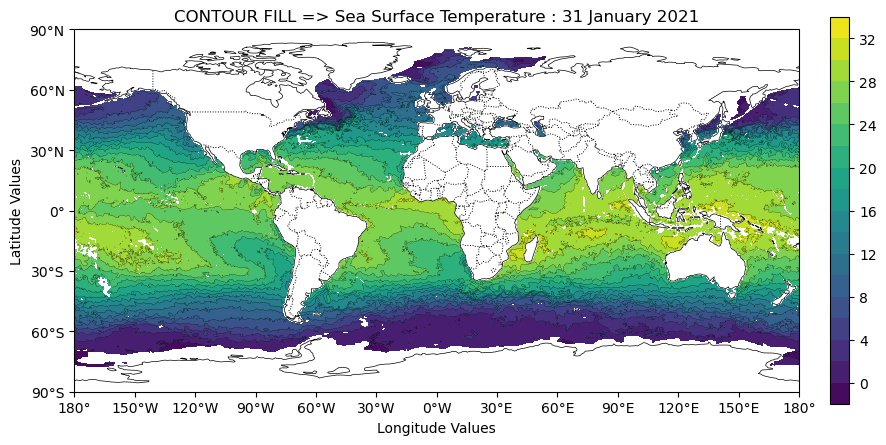

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


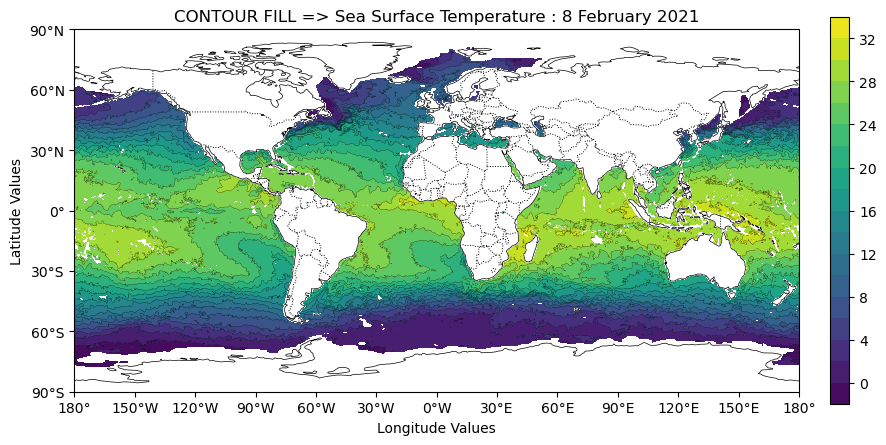

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


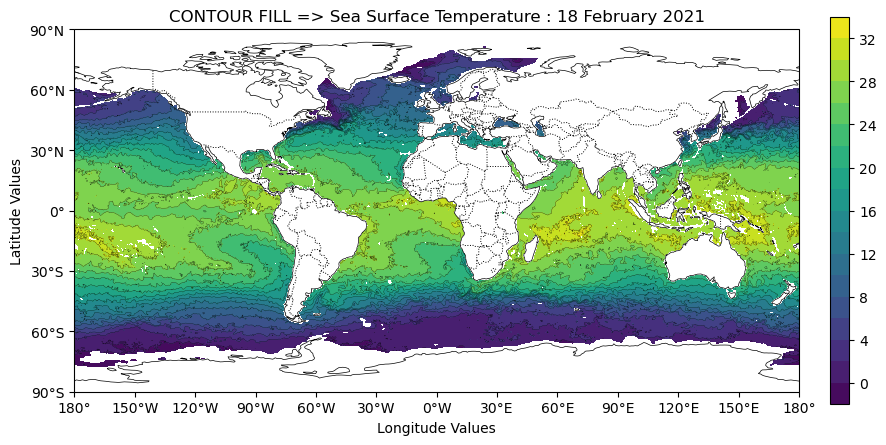

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


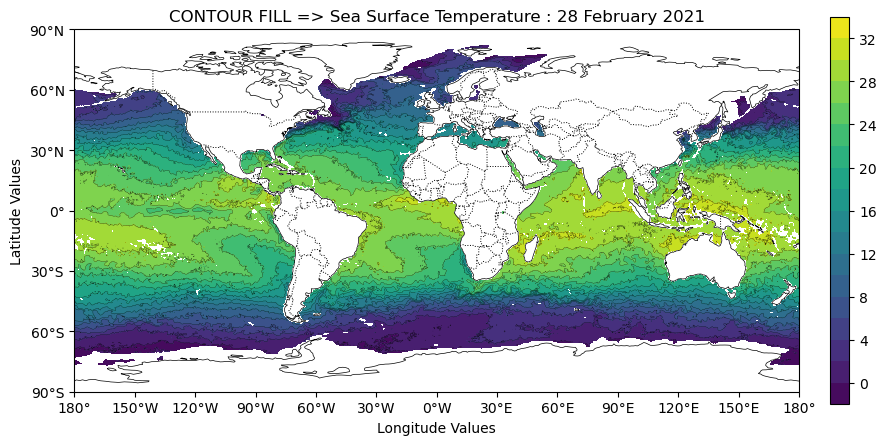

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


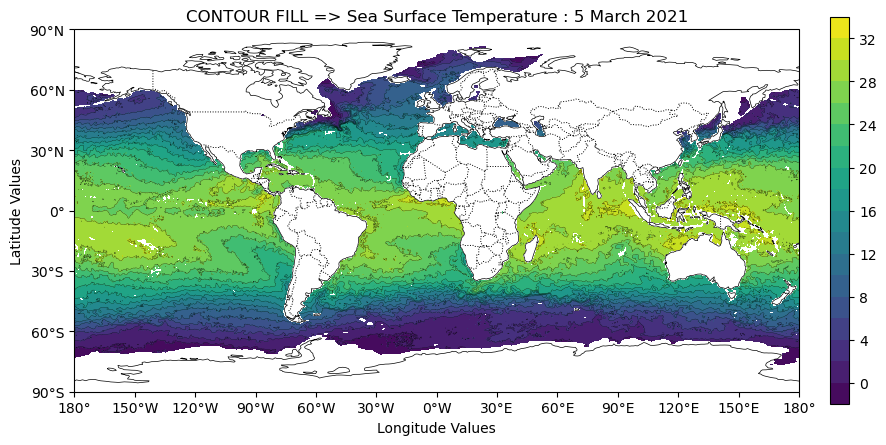

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


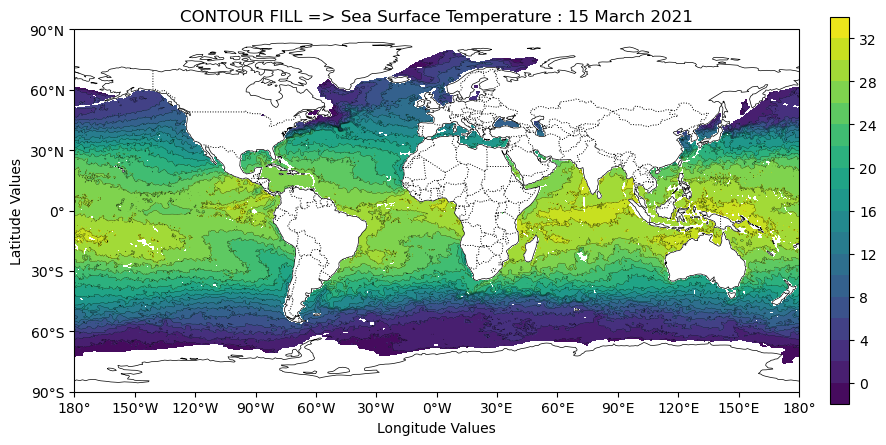

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


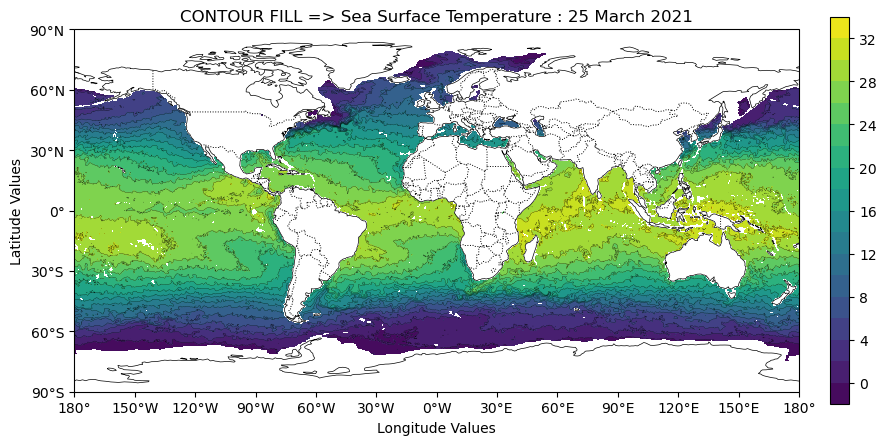

C:\Users\suyash\AppData\Local\Temp\ipykernel_7408\172625833.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  contour_fill_list.append(imageio.imread(buf))


In [9]:
# List to store filled contour maps
contour_fill_list = []

# Number of isovalue lines
isovalue_lines = 20

# Function to add a filled contour map to the list
def add_contour_fill(fig):
    buf = io.BytesIO()
    fig.canvas.print_png(buf)
    buf.seek(0)
    contour_fill_list.append(imageio.imread(buf))

# Loop through the datasets
for i in range(number_of_datasets):
    # Generate the current filled contour map
    current_contour = contour_fill(dataset_list[i], latitude_list[i], longitude_list[i], title_list[i], isovalue_lines)
    
    # Add the current filled contour map to the list
    add_contour_fill(current_contour)

def save_contour_fill_images(contour_fill_list):
    folder_path = './images'
    for i, image in enumerate(contour_fill_list):
        image_path = os.path.join(folder_path, f'contour_fill_{i}.png')
        imageio.imwrite(image_path, image)

save_contour_fill_images(contour_fill_list)

In [ ]:
# Save the list of contour fills as a GIF
imageio.mimsave('contour_fill.gif', contour_fill_list, fps=1, loop=10)